## Projet Pacte Semestre 8 : Predictive Maintenance
### Sujet : Machine learning pour la maintenance prédictive 

Dans le cadre de ce projet nous nous interessons à la prédiction de la maintenance des machines. Il s'agirait donc de prédire si une machine va tomber en panne et quel est le type de panne.

Nous allons utiliser un dataset composé de 10000 enregistrements et 14 features

In [24]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


#### Chargement des données

In [25]:
#Chagement des données
data = pd.read_csv("predictive_maintenance.csv")

In [26]:
#Affichage des premiers enregistrements
data.head(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,No Failure
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,No Failure
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,No Failure
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,No Failure
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,No Failure


In [27]:
# Nombre d'enregistrements et de features
data.shape

(10000, 10)

In [28]:
# Valerus manquantes 
valeurs_manquantes = data.isna().sum()
print("Valeur manquantes pat colonne : \n",valeurs_manquantes)

Valeur manquantes pat colonne : 
 UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64


In [29]:
# Valeurs uniques
data.nunique()

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Target                         2
Failure Type                   6
dtype: int64

In [30]:
#valeurs dupliquées
data.duplicated().sum()

np.int64(0)

In [31]:
data.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [32]:
# Vérifier les valeurs uniques pour chaque variable.
unique_values = {col: data[col].nunique() for col in data.columns}

# Convertir en DataFrame pour un meilleur affichage
unique_values_df = pd.DataFrame(list(unique_values.items()), columns=['Column', 'Unique Values'])

# Afficher les valeurs uniques
print(unique_values_df)

# Compter les valeurs uniques dans chaque colonne
unique_counts = data.nunique()

# Afficher les valeurs uniques pour les colonnes avec moins de 10 valeurs uniques
for col in data.columns:
    if unique_counts[col] < 10:
        print(f"Column: {col}")
        print("Unique Values:", data[col].unique())
        print("-" * 30)

                    Column  Unique Values
0                      UDI          10000
1               Product ID          10000
2                     Type              3
3      Air temperature [K]             93
4  Process temperature [K]             82
5   Rotational speed [rpm]            941
6              Torque [Nm]            577
7          Tool wear [min]            246
8                   Target              2
9             Failure Type              6
Column: Type
Unique Values: ['M' 'L' 'H']
------------------------------
Column: Target
Unique Values: [0 1]
------------------------------
Column: Failure Type
Unique Values: ['No Failure' 'Power Failure' 'Tool Wear Failure' 'Overstrain Failure'
 'Random Failures' 'Heat Dissipation Failure']
------------------------------


### Résumé du Jeu de Données

#### 1. Informations Générales
- Le jeu de données contient **10 000 lignes** et **10 colonnes**.
- Il n'y a **aucune valeur manquante** ou **valeur nulle** dans aucune des colonnes.
- Il n'y a **pas de doublons** dans le jeu de données.

#### 2. Valeurs Uniques
- **UID** et **ID Produit** ont **10 000 valeurs uniques**, ce qui signifie que chaque ligne a un identifiant unique.
- **Type** a **3 valeurs uniques** : `['M', 'L', 'H']`, représentant différents niveaux de qualité de produit.
- **Cible (Échec ou Non)** a **2 valeurs uniques** : `[0, 1]`, où `0` signifie qu'il n'y a pas de défaillance et `1` signifie qu'il y a une défaillance.
- **Type de Défaillance** a **6 valeurs uniques** :  
  - `'Pas de défaillance'`  
  - `'Défaillance d'alimentation'`  
  - `'Défaillance de l'outil'`  
  - `'Défaillance par surcontrainte'`  
  - `'Défaillances aléatoires'`  
  - `'Défaillance par dissipation de chaleur'`  

#### 3. Informations Statistiques
- **Température de l'air [K]** : Varie de **295,3 K à 304,5 K** avec une moyenne de **300 K**.  
- **Température du processus [K]** : Varie de **305,7 K à 313,8 K** avec une moyenne de **310 K**.  
- **Vitesse de rotation [tr/min]** : Varie entre **1168 et 2886 tr/min**, avec une moyenne de **1538 tr/min**.  
- **Couple [Nm]** : Varie de **3,8 à 76,6 Nm**, avec une moyenne de **39,98 Nm**.  
- **Usure de l'outil [min]** : Varie entre **0 et 253 minutes**, avec une moyenne de **107,95 minutes**.  

#### 4. Observations Clés sur le Jeu de Données
- Le jeu de données est **propre**, sans **valeurs manquantes ni doublons**.
- La plupart des caractéristiques sont **numériques**, sauf **Type** et **Type de Défaillance**, qui sont **catégorielles**.
- **Les défaillances ne se produisent que dans une petite portion des données** (la moyenne de **Cible** est de **0,0339**, ce qui signifie que ~3,4% des cas ont des défaillances).
- **Différents types de défaillances** existent, ce qui rend important de classifier correctement les défaillances.

Ce jeu de données est bien structuré pour **la détection de pannes de machines** et sera utilisé pour entraîner un modèle de **détection d'anomalies**.


In [33]:
# Création d'une copie de la data pour les modifications
df = data.copy()

In [34]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [35]:
#Suppression des variables non pertinentes (UDI, Product ID)
df.drop(columns=['UDI', 'Product ID'], inplace=True)

In [36]:
# Set numeric columns dtype to float
df['Tool wear [min]'] = df['Tool wear [min]'].astype('float64')
df['Rotational speed [rpm]'] = df['Rotational speed [rpm]'].astype('float64')
# Rename features
df.rename(mapper={'Air temperature [K]': 'Air temperature',
                    'Process temperature [K]': 'Process temperature',
                    'Rotational speed [rpm]': 'Rotational speed',
                    'Torque [Nm]': 'Torque',
                    'Tool wear [min]': 'Tool wear'}, axis=1, inplace=True)

### Séparation des features et des variables cibles

In [37]:
features = [col for col in df.columns
            if df[col].dtype=='float64' or col =='Type']

target = ['Target','Failure Type']

In [38]:
# Les portions de données avec des Randoms Failures (Target = 0 mais il y a des faillures)
index_random_failure = df.loc[df['Failure Type']=='Random Failures'].index
df.loc[index_random_failure,target]

,Target,Failure Type
1221,0,Random Failures
1302,0,Random Failures
1748,0,Random Failures
2072,0,Random Failures
2559,0,Random Failures
3065,0,Random Failures
3452,0,Random Failures
5471,0,Random Failures
5489,0,Random Failures
5495,0,Random Failures


In [39]:
df.loc[index_random_failure,target].shape

(18, 2)

#### On supprime ces données parce qu'elle ne sont pas nobreuses et en plus elles sont aléatoires.

In [40]:
# Première suppression d'observations (RNF=1 mais Machine failure=0)

first_drop = df.loc[index_random_failure,target].shape[0]
print('Nombre des observations ou RNF=1 mais Machine failure=0 :',first_drop)
# Supprimer les obseravtions correspondantes et la colonne RNF
df.drop(index=index_random_failure, inplace=True)

Nombre des observations ou RNF=1 mais Machine failure=0 : 18


In [41]:
# Observations où Target est à 1 mains Failure Type est à No failure

index_ambuigous = df.loc[(df['Target']==1) & (df['Failure Type']=='No Failure')].index
df.loc[index_ambuigous,target]

,Target,Failure Type
1437,1,No Failure
2749,1,No Failure
4044,1,No Failure
4684,1,No Failure
5536,1,No Failure
5941,1,No Failure
6478,1,No Failure
8506,1,No Failure
9015,1,No Failure


In [42]:
index_ambuigous = df.loc[(df['Target']==1) & (df['Failure Type']=='No Failure')].index

# Mettre la  valeur de Target à 0 pour ces observations
df.loc[index_ambuigous,'Target'] = 0

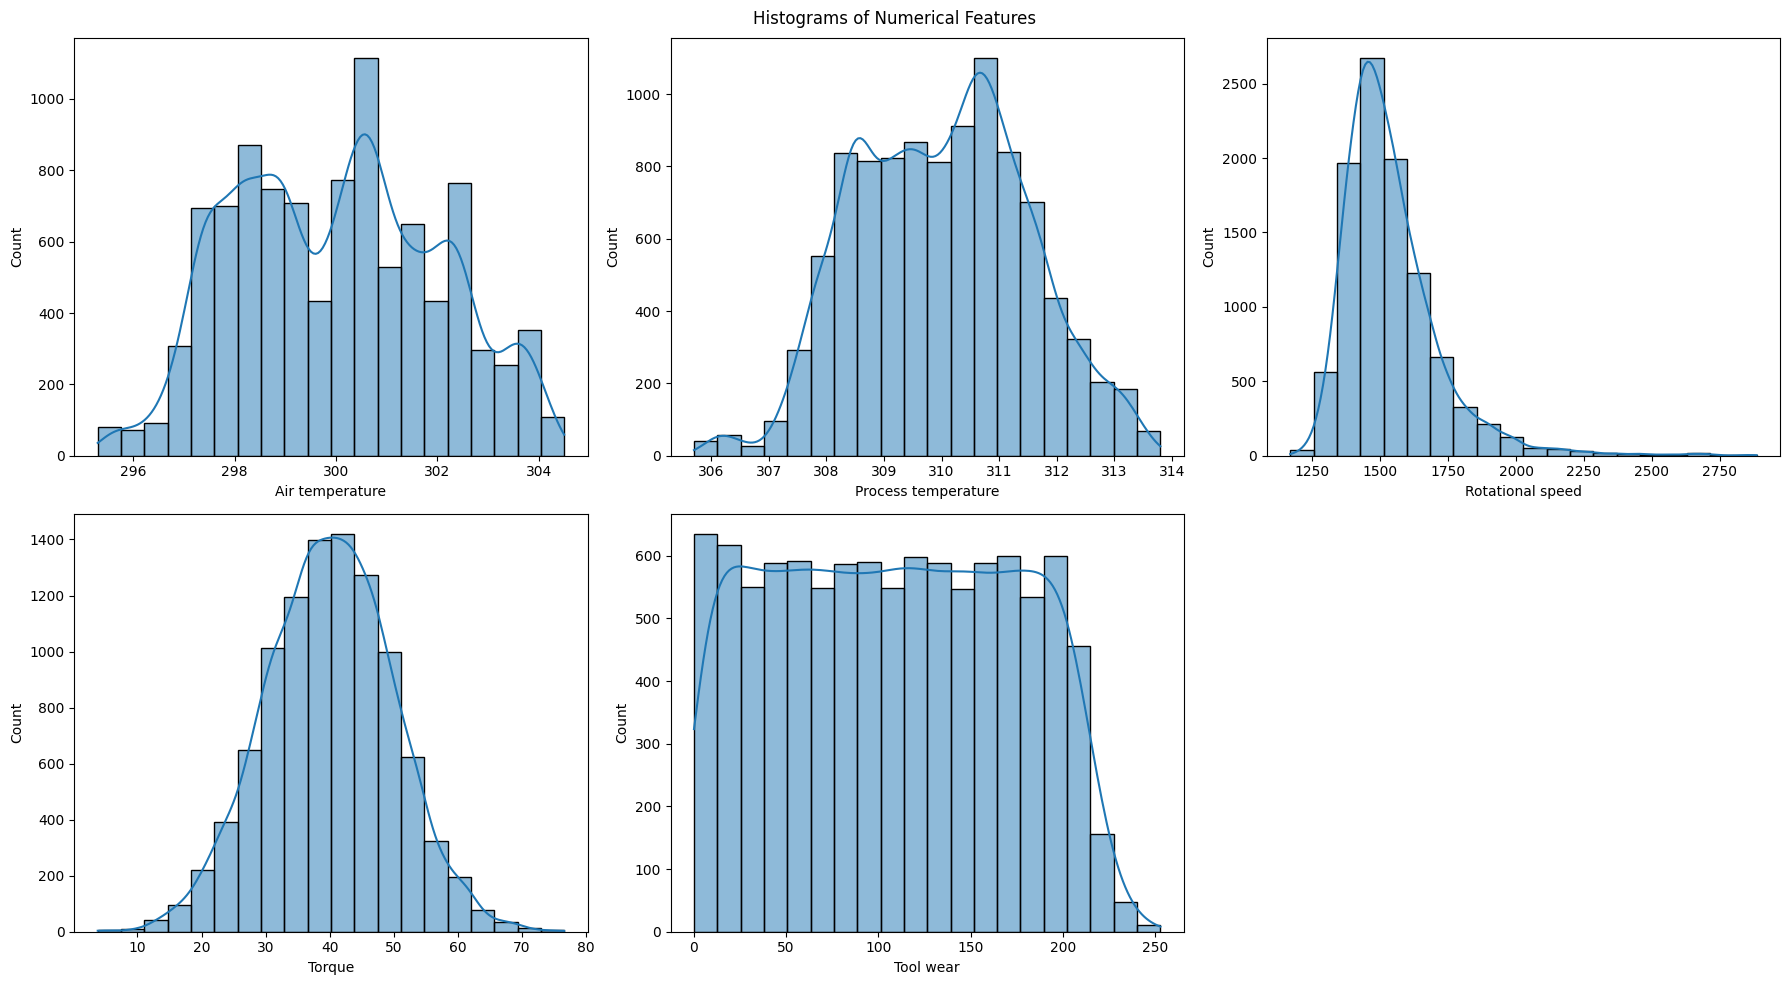

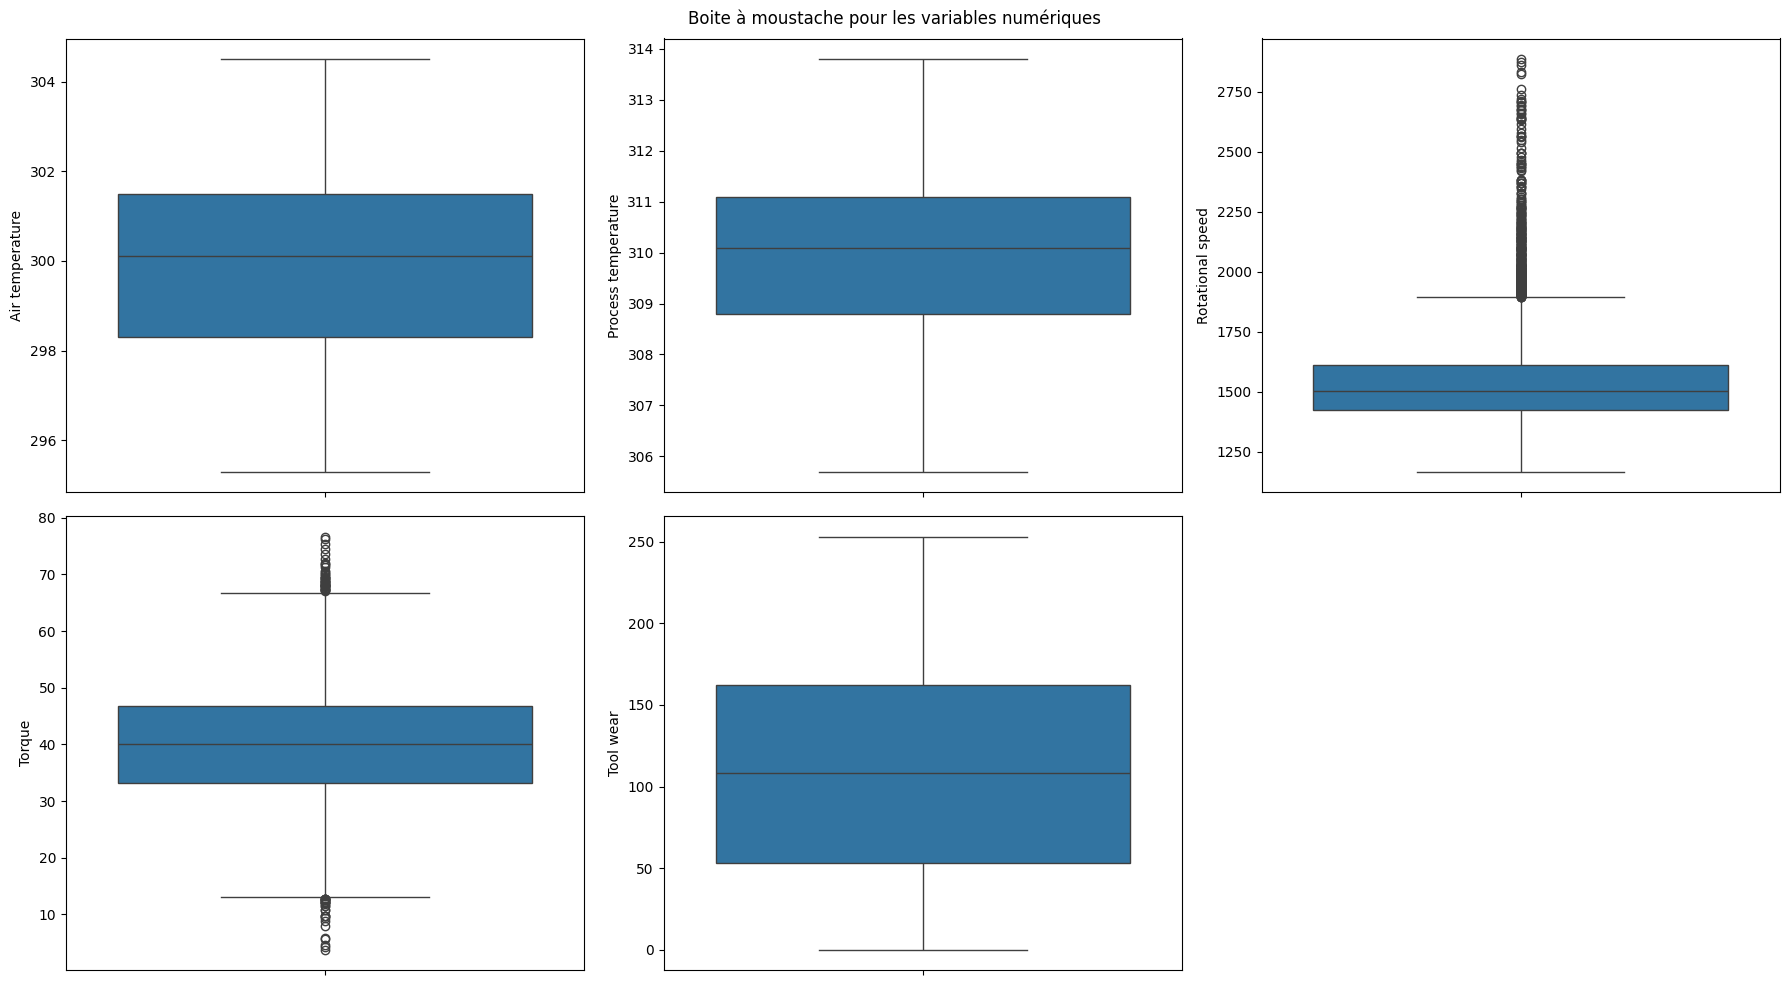

In [44]:
numerical_features = [feature for feature in features if df[feature].dtype=='float64']

# Histogrammes des variables numériques
plt.figure(figsize=(18, 10))
plt.suptitle('Histograms of Numerical Features')

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], bins=20, kde=True)
    plt.xlabel(feature)
    
plt.tight_layout()
plt.show()
    
# Boxplots des variables numériques
plt.figure(figsize=(18, 10))
plt.suptitle('Boite à moustache pour les variables numériques')

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[feature])
    plt.ylabel(feature)
    
plt.tight_layout()
plt.show()